# First, Get Ready!
![spiderman](https://media.giphy.com/media/EU42nA5hrKn16/giphy.gif)

In [113]:
#!pip install keras

import keras
keras.__version__
import pandas as pd

# A first look at a neural network

This notebook contains the code samples found in Chapter 2, Section 1 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). Note that the original text features far more content, in particular further explanations and figures: in this notebook, you will only find source code and related comments.

----

We will now take a look at a first concrete example of a neural network, which makes use of the Python library Keras to learn to classify 
hand-written digits. Unless you already have experience with Keras or similar libraries, you will not understand everything about this 
first example right away. You probably haven't even installed Keras yet. Don't worry, that is perfectly fine. In the next chapter, we will 
review each element in our example and explain them in detail. So don't worry if some steps seem arbitrary or look like magic to you! 
We've got to start somewhere.

The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 
categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been 
around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test 
images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of "solving" MNIST 
as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. As you become a machine 
learning practitioner, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [114]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

`train_images` and `train_labels` form the "training set", the data that the model will learn from. The model will then be tested on the 
"test set", `test_images` and `test_labels`. Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging 
from 0 to 9. There is a one-to-one correspondence between the images and the labels.

Let's have a look at the training data:

In [115]:
train_images.shape

(60000, 28, 28)

In [116]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Let's have a look at the test data:

In [117]:
test_images.shape

(10000, 28, 28)

In [119]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Populating the interactive namespace from numpy and matplotlib


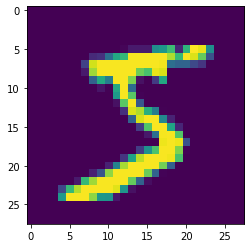

Label =>>> 5


In [121]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy

i = 0 #choose a random component
img = train_images[i]
imgplot = plt.imshow(img)
plt.show()
print('Label =>>>',train_labels[i])

# How Neural Networks Work? [Main Ideas]

1. Reading Material: https://becominghuman.ai/making-a-simple-neural-network-2ea1de81ec20
2. One Shot Illustration--> NN::LR
![Brewery](./images/NN.jpg)
3. One Shot Illustration

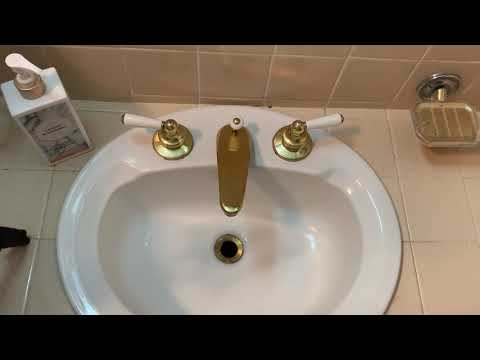

In [122]:
from IPython.display import YouTubeVideo
# a talk about IPython at Sage Days at U. Washington, Seattle.
# Video credit: William Stein.
YouTubeVideo('6laMF5uWlKY')

# Training a Neural Network is like tweaking faucea Brewery to get the best beer!
![Beer](./images/IPA-Packaged.png)
![Beer](./images/Pumpkin-Ale-Web-Packaged.png)

![Brewery](./images/brewery.jpg)

# Let's build a Neural Network on Keras! [That's much easier than what you might think!]
Our workflow will be as follow: first we will present our neural network with the training data, `train_images` and `train_labels`. The 
network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for `test_images`, and we 
will verify if these predictions match the labels from `test_labels`.

Let's build our network -- again, remember that you aren't supposed to understand everything about this example just yet.

In [123]:
from keras import models
from keras.models import load_model
from keras import layers

network_dense = models.Sequential()

#add model layers
network_dense.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_dense.add(layers.Dense(256, activation='relu', input_shape=(512,)))

network_dense.add(layers.Dense(10, activation='softmax'))


The core building block of neural networks is the "layer", a data-processing module which you can conceive as a "filter" for data. Some 
data comes in, and comes out in a more useful form. Precisely, layers extract _representations_ out of the data fed into them -- hopefully 
representations that are more meaningful for the problem at hand. Most of deep learning really consists of chaining together simple layers 
which will implement a form of progressive "data distillation". A deep learning model is like a sieve for data processing, made of a 
succession of increasingly refined data filters -- the "layers".

Here our network consists of a sequence of two `Dense` layers, which are densely-connected (also called "fully-connected") neural layers. 
The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). Each 
score will be the probability that the current digit image belongs to one of our 10 digit classes.

To make our network ready for training, we need to pick three more things, as part of "compilation" step:

* A **loss function**: the is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be 
able to steer itself in the right direction.
* An **optimizer**: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
* **Metrics** to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly 
classified).

The exact purpose of the loss function and the optimizer will be made clear throughout the next two chapters.


In [124]:
network_dense.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in 
the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with 
values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [125]:
train_images.shape

(60000, 28, 28)

In [126]:
train_images_rsh_dense = train_images.reshape((60000, 28 * 28))
train_images_rsh_dense = train_images_rsh_dense.astype('float32') / 255

test_images_rsh_dense = test_images.reshape((10000, 28 * 28))
test_images_rsh_dense = test_images_rsh_dense.astype('float32') / 255

In [127]:
train_images_rsh_dense.shape

(60000, 784)

We also need to categorically encode the labels, a step which we explain in chapter 3:

In [128]:
from keras.utils import to_categorical

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data.

In [129]:
history_dense = network_dense.fit(train_images_rsh_dense, train_labels_cat, # training imput features (images in this example!) and their assigned labels
                      validation_data=(test_images_rsh_dense, test_labels_cat), # this line is optional: telling the model to evaluate the model as it gets trained!
                      epochs=10, batch_size=1024) # setting the hyper parameters of the neural network

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.5031 - accuracy: 0.8446 - val_loss: 0.2363 - val_accuracy: 0.9281
Epoch 2/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.1930 - accuracy: 0.9414 - val_loss: 0.1414 - val_accuracy: 0.9568
Epoch 3/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.1282 - accuracy: 0.9596 - val_loss: 0.1076 - val_accuracy: 0.9663
Epoch 4/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0938 - accuracy: 0.9709 - val_loss: 0.1239 - val_accuracy: 0.9594
Epoch 5/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0701 - accuracy: 0.9782 - val_loss: 0.0737 - val_accuracy: 0.9769
Epoch 6/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0561 - accuracy: 0.9825 - val_loss: 0.0741 - val_accuracy: 0.9784
Epoch 7/10
60000/60000 [==============================] - 3s 44us/st

In [16]:
# Saving my model
network_dense.save('my_model_den.h5')  # creates a HDF5 file 'my_model.h5'

In [17]:
# Loading my model
network_dense = load_model('my_model_den.h5')

Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data. Now let's check that our model performs well on the test set too:

In [130]:
test_loss_dense, test_acc_dense = network_dense.evaluate(test_images_rsh_dense, test_labels_cat)

10000/10000 [==============================] - 1s 85us/step


In [131]:
print('test_accuracy with DNN:', test_acc_dense)

test_accuracy with DNN: 0.9672999978065491



Our test set accuracy turns out to be 97.8% -- that's quite a bit lower than the training set accuracy. 
This gap between training accuracy and test accuracy is an example of "overfitting", 
the fact that machine learning models tend to perform worse on new data than on their training data. 
Overfitting will be a central topic in chapter 3.

This concludes our very first example -- you just saw how we could build and a train a neural network to classify handwritten digits, in 
less than 20 lines of Python code. In the next chapter, we will go in detail over every moving piece we just previewed, and clarify what is really 
going on behind the scenes. You will learn about "tensors", the data-storing objects going into the network, about tensor operations, which 
layers are made of, and about gradient descent, which allows our network to learn from its training examples.

# Monitoring The Model Performance During the Training

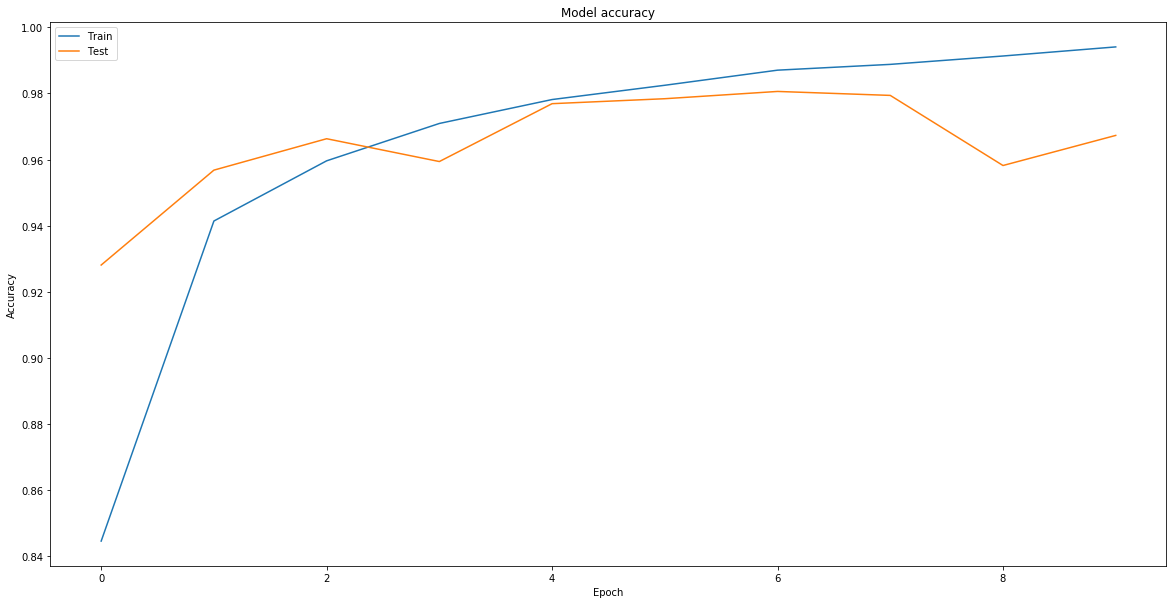

In [132]:

# Plot training & validation accuracy values
plt.figure(figsize=(20,10))
plt.plot(history_dense.history['accuracy'])
plt.plot(history_dense.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

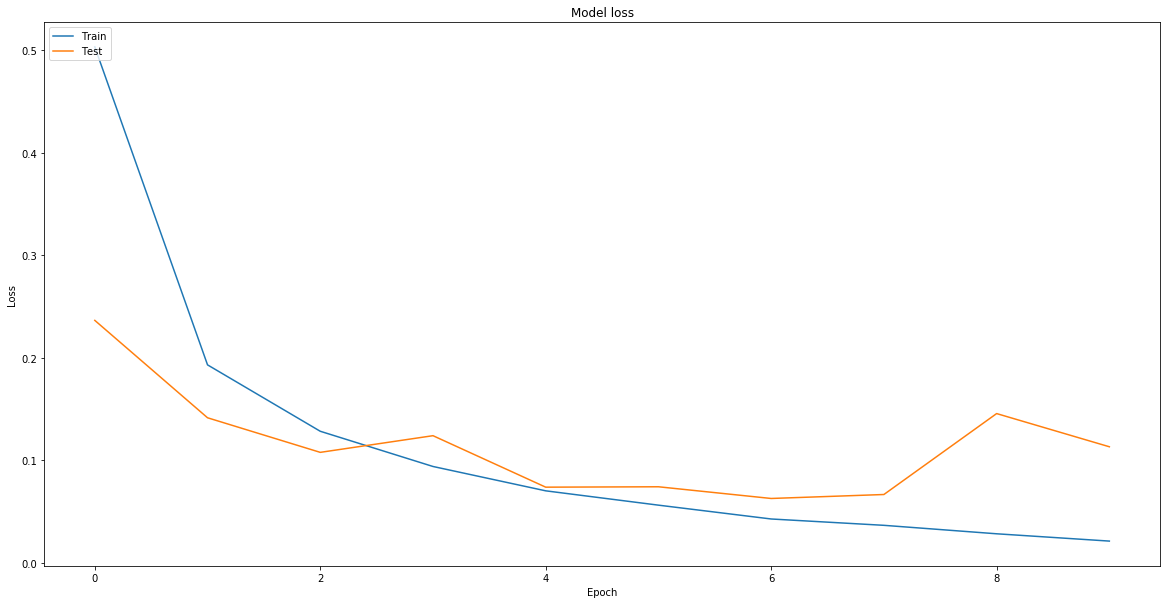

In [133]:

# Plot training & validation accuracy values
plt.figure(figsize=(20,10))
plt.plot(history_dense.history['loss'])
plt.plot(history_dense.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Let's Look at One Single Image from Test Set

Populating the interactive namespace from numpy and matplotlib


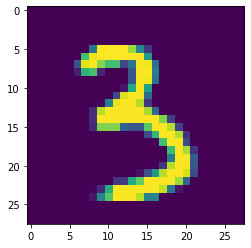

Shape =  (28, 28)
Label =  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [136]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#######
i = 32
#######

img = test_images[i]
imgplot = plt.imshow(img)
plt.show()
print('Shape = ', img.shape)
print('Label = ',test_labels_cat[i])

In [137]:
print('Prediction = ', network_dense.predict_classes(test_images_rsh_dense)[i])

Prediction =  3


# Let's Look at One Single Image from You!

In order to import your image, please follow these steps in order:
1. Write down a digit on a piece of papaer!
2. Take a picture of it and saved as .jpg!
3. Upload that file into `sample_handwrittings` folder!

** For the best result, make sure the background is white color and the digit fills the screen (not so different from the images that our model have trained with!)

In [139]:
!pwd

/Users/smirs/git_projects/deep-learning-with-python-notebooks/darknet


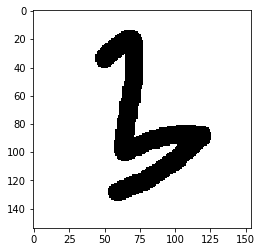

In [164]:
# Lookinf at raw image
from PIL import Image 
img_file = "./sample_handwrittings/my_003.png"
img = Image.open(img_file)
plt.imshow(img)

In [165]:
# Resize to 28X28

# Improting Image class from PIL module  
from PIL import Image  
  
# Opens a image in RGB mode  
im = Image.open(img_file)  
newsize = (28, 28) 
im1 = im.resize(newsize) 

# Separate Color Channels [RGB]
C, M, Y, K = im1.split()

# Shows the image in image viewer  
img_resize_file = "~/Desktop/my_handwritting_2.jpg"
C.save(img_resize_file)
C

In [166]:
# Read re-sized image and look at it!

import matplotlib.image as img
image_rsh = img.imread(img_resize_file)
print(image_rsh.shape)

(28, 28)


In [167]:
# Reshape for Neural Net
image_rsh = image_rsh.reshape(28*28)
image_rsh = image_rsh.astype('float32') / 255
image_rsh.shape

(784,)

In [168]:
# Convert to its complement 
image_rsh = 1-image_rsh
image_rsh[0:20]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03137255,
       0.        , 0.01176471, 0.01568627, 0.01960784, 0.        ,
       0.03921568, 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

In [169]:
# Put it into an array
image_rsh_arr = array([image_rsh], dtype=float32)

In [170]:
# Look at the Predicted Value!
print('Precitction =', network_dense.predict_classes(image_rsh_arr)[0])

Precitction = 3


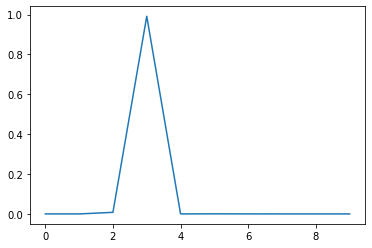

In [171]:
# Look at the propabilities
plot(network_dense.predict(image_rsh_arr)[0].tolist())

# Convolutional Neural Network

## What is CNN? What is that good for? and... How does that work?

### What is it good for?
* Mostly for object detection/classification in images processing!
* Input = Images ---> Output = Text

![Brewery](./images/001.png)


### What is Convolution?
* You can think of convolution as sliding a small filter across a whole image and looking through it!
* At each segment of the picture you can use multiple filters to examine for different features!

![Brewery](./images/002.png)


### Can you show me Convolution in a simple example?
* **Padding**: You add some extra frame for your convenience!
* **Strides**: How big you jump!

![Brewery](./images/003.png)


### What are the filters? What filters should we use?
* The **bad news** is that choosing what filters should be use can be challenging!
* The **good news** is that researchers have figured it out before!

![Brewery](./images/004.png)


### What is Max Pooling? and what does it do?
* makes the image smaller for simplicity!

![Brewery](./images/005.png)

## All in one shot! How CNN works?
![Brewery](./images/006.png)

Check out the full picture in motion here! http://cs231n.github.io/convolutional-networks/

## What does the filter really do?
* Filters look for specific patters in the image!
* Edge detection is important!

![Brewery](./images/007.png)
![Brewery](./images/007_2.png)
![Brewery](./images/007_3.png)


---

![Brewery](./images/008.png)


# OK, let's do it!
![spiderman](https://media.giphy.com/media/hAxSXWmRnRnJm/giphy.gif)

## Let's Design and Train and Evaluate our own CNN!
**Is it hard to implement? Nope! It's piece'a cake! Thanks Keras! You are the best!**

In [172]:
#define one object as a sequencial model
network_cnn = models.Sequential()

#add model layers
network_cnn.add(layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1))) # convolutional layer including `
network_cnn.add(layers.Conv2D(32, kernel_size=3, activation='relu'))
network_cnn.add(layers.Flatten())

#add model layers
network_cnn.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_cnn.add(layers.Dense(256, activation='relu', input_shape=(512,)))

network_cnn.add(layers.Dense(10, activation='softmax'))

## As you can see Neural Netwrk is always a bunck of layers on top of each other!
![Brewery](https://media.giphy.com/media/XMgCFjsCSARxK/giphy.gif)

In [173]:
# Set up the metrics!
network_cnn.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [174]:
train_images.shape

(60000, 28, 28)

In [175]:
train_images_rsh_cnn = train_images.reshape((60000, 28 , 28, 1))
train_images_rsh_cnn = train_images_rsh_cnn.astype('float32') / 255

test_images_rsh_cnn = test_images.reshape((10000, 28 , 28, 1))
test_images_rsh_cnn = test_images_rsh_cnn.astype('float32') / 255

In [176]:
train_images_rsh_cnn.shape

(60000, 28, 28, 1)

In [177]:
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

In [178]:
history_cnn = network_cnn.fit(train_images_rsh_cnn, train_labels_cat, # training imput features (images in this example!) and their assigned labels
                       validation_data=(test_images_rsh_cnn, test_labels_cat), # this line is optional: telling the model to evaluate the model as it gets trained!
                       epochs=10, batch_size=1024) # setting the hyper parameters of the neural network

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
54272/60000 [==========================>...] - ETA: 11s - loss: 0.4773 - accuracy: 0.8577

KeyboardInterrupt: 

In [43]:
# Saving my model
network_cnn.save('my_model_cnn.h5')  # creates a HDF5 file 'my_model.h5'

In [179]:
# Loading my model
network_cnn = load_model('my_model_cnn.h5')

In [180]:
test_loss_cnn, test_acc_cnn = network_cnn.evaluate(test_images_rsh_cnn, test_labels_cat)
print('test_acc_cnn:', test_acc_cnn)

10000/10000 [==============================] - 8s 755us/step
test_acc_cnn: 0.988099992275238


In [18]:
# Plot training & validation accuracy values
plt.figure(figsize=(20,10))
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'history_cnn' is not defined

<Figure size 1440x720 with 0 Axes>

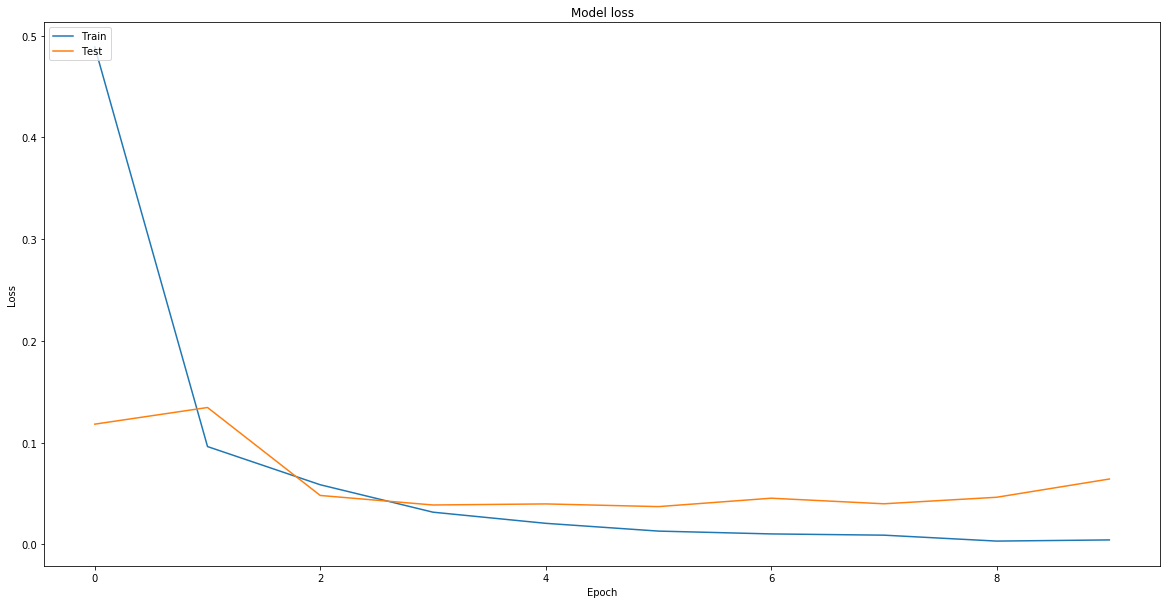

In [51]:
# Plot training & validation accuracy values
plt.figure(figsize=(20,10))
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Let see what does our CNN predict for an uploaded image...

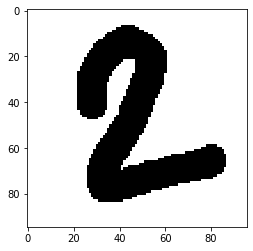

In [191]:
# Lookinf at raw image
from PIL import Image 
img_file = "./sample_handwrittings/my_002.png"
img = Image.open(img_file)
plt.imshow(img)

In [192]:
# Resize to 28X28

# Improting Image class from PIL module  
from PIL import Image  
  
# Opens a image in RGB mode  
im = Image.open(img_file)  
newsize = (28, 28) 
im1 = im.resize(newsize) 

# Separate Color Channels [RGB]
C, M, Y, K = im1.split()

# Shows the image in image viewer  
img_resize_file = "~/Desktop/my_handwritting_2.jpg"
C.save(img_resize_file)
C

In [193]:
# Read re-sized image and look at it!

import matplotlib.image as img
image_rsh = img.imread(img_resize_file)
print(image_rsh.shape)

(28, 28)


In [194]:
# Reshape for Neural Net
image_rsh = image_rsh.reshape(28,28,1)
image_rsh = image_rsh.astype('float32') / 255
image_rsh.shape

(28, 28, 1)

In [195]:
# Convert to its complement 
image_rsh = 1-image_rsh
#image_rsh[0:20]

In [196]:
# Put it into an array
image_rsh_arr = array([image_rsh], dtype=float32)

In [197]:
# Look at the Predicted Value
print('Prediction = ', network_cnn.predict_classes(image_rsh_arr)[0])

Prediction =  2


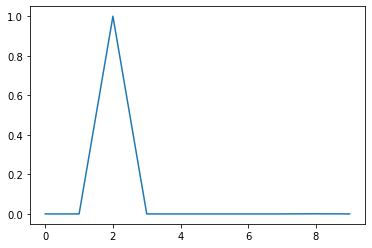

In [198]:
# Look at the propabilities
plot(network_cnn.predict(image_rsh_arr)[0].tolist())

# You don't have to always train model on your own data!
# Let's do something more fun!
![sheldon](https://media.giphy.com/media/9nhE1iPKLnGcU/giphy.gif)

In [ ]:
# Download the model! i.e. "Darknet"
# More details on Darknet and Yolo can be found here: https://pjreddie.com/darknet/yolo/
!git clone https://github.com/pjreddie/darknet

In [ ]:
# Download the weights [pretrained model]
!wget https://pjreddie.com/media/files/yolov3.weights

In [101]:
import os
os.getcwd()

'/Users/smirs/git_projects/deep-learning-with-python-notebooks'

In [199]:
# Change directory and display where we are!
os.chdir('./darknet/')
!pwd

/Users/smirs/git_projects/deep-learning-with-python-notebooks/darknet


In [62]:
# Setup "Darknet"
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o obj/image.o
gcc 

In [208]:
# Display the raw image that you want to use for Object Detection!
!open ~/git_projects/deep-learning-with-python-notebooks/images/coder_girl_cnn.jpg

In [205]:
# Run Darknet! [in order to do Object Detection in your target image]
!./darknet detect cfg/yolov3.cfg ~/Downloads/yolov3.weights ~/git_projects/deep-learning-with-python-notebooks/images/coder_girl_cnn.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

In [209]:
# Display the post-proccessed image!
!open ./predictions.jpg

# Thank You!